# Assignment 6 - Dynamic Programming
## Part 1 - Sequence alignment

Let's start by looking at the sequence alignment problem as described in the book, this task will be based on the following pseudocode from the book:

```
Alignment(X,Y)
    Array A[0 . . . m,0... n]
    Initialize A[i, 0]= iδ for each i
    Initialize A[0, j]= jδ for each j
    For j = 1, . . . , n
        For i = 1, . . . , m
            Use the recurrence (6.16) to compute A[i, j]
        Endfor
    Endfor
    Return A[m, n]
```
With recurrence 6.16 being as follows:
$OPT(i, j) = min[α_{x_{i-1}y_{j-1}} + OPT(i − 1, j − 1), δ + OPT(i − 1, j), δ + OPT(i, j − 1)]$

Notice that we've made a slight change to the recurrence when compared to the book, this is to fit in with Python syntax

As always, make sure that you properly understand the problem before doing these exercises, as it will greatly help you to understand and master the algorithm. 

### 1.1 - Setting up $\alpha$ and $\delta$
Lets start by setting up alpha and delta, for this version, we'll have delta be 2. Alpha should return 1 if x and y don't match and 0 if they do. Use a [lambda function](https://www.w3schools.com/python/python_lambda.asp) to implement alpha. 

In [ ]:
# TODO change alpha according to the definitions above and in the book
alpha = lambda a: a # Just som example code for the lambda function, replace it with the actual implementation
delta = 2 # No need to change, delta is just a static value, in this case 2

### 1.2 - Setting up A
Next we want to set up A according to the pseudocode

> Remember that Python is 0-indexed 

In [ ]:
def array_setup(n: int, m: int) -> list:
    A = None
    # TODO
    # Array A[0 . . . m,0... n]
    # Initialize A[i, 0]= iδ for each i
    # Initialize A[0, j]= jδ for each j
    return A


def array_print(A: list):
    """Prints a 2D python list of numbers nicely"""
    max_num_len = max((len(str(num)) for row in A for num in row))
    for row in A:
        print(" ".join([f"{' '*(max_num_len-len(str(num)))}{num}" for num in row]))


array_print(array_setup(7, 6))

The `array_print()` function is used to test if you got the right output, expected output: 
```
 0  2  4  6  8 10 12 14
 2  0  0  0  0  0  0  0
 4  0  0  0  0  0  0  0
 6  0  0  0  0  0  0  0
 8  0  0  0  0  0  0  0
10  0  0  0  0  0  0  0
12  0  0  0  0  0  0  0
```


### 1.3 - Implementing the algorithm
Now after setting up the array, we want to make the algorithm. Follow the pseudocode and implement this final part

In [ ]:
def alignment(x: str, y: str) -> int:
    n = len(y)
    m = len(x)
    A = array_setup(n, m)

    # TODO
    # For j = 1, . . . , n
    #    For i = 1, . . . , m
    #         Use the recurrence (6.16) to compute A[i, j]
    #    Endfor
    # Endfor

    array_print(A)
    return A[m][n]

### 1.4 Testing the algorithm
Now let's see if it all works, run the code block below to test the algorithm

In [ ]:
def main():
    x = "PALETTE"
    y = "PALATE"
    result = alignment(x, y)
    print(f"\nAlignment: {result}")


main()

Expected output:
```
 0  2  4  6  8 10 12
 2  0  2  4  6  8 10
 4  2  0  2  4  6  8
 6  4  2  0  2  4  6
 8  6  4  2  1  3  4
10  8  6  4  3  1  3
12 10  8  6  5  3  2
14 12 10  8  7  5  3

Alignment: 3
```

## Part 2 - Longest common subsequence (LCS)

The Longest Common Subsequence (LCS) problem is a classic example of dynamic programming, commonly used in fields such as genetics, data comparison, and more. LCS is the longest subsequence common to all sequences in a set of sequences (often just two sequences). It is the basis of many data comparison programs, such as the UNIX `diff` utility, and is used in `git` for tracking changes made to a file over time. In this exercise, you will implement an algorithm to find the LCS of two strings.

#### Example

Let `string1` be "XMJYAUZ" and `string2` be "MZJAWXU". The longest common subsequence is "MJAU", which has a length of 4.

##### Important
- The Longest common **subsequence** differs from the longest common **substring**. Unlike substrings, subsequences are not required to occupy consecutive positions within the original sequences.
- Note that "MJAU" is **not** a substring of either `string1` or `string2`. However, the letters "M", "J", "A" and "U" occurs in sequence (one after another, from left to right) which is the property we care about for this problem.

#### Overview

1. We begin by creating a LCS table which is used to store the LCS length for each index of the strings. In the table below, the $i$-th row and $j$-th column shows the length of the LCS between $X_{1..i}$ and $Y_{1..j}$ (where $X$ represents `string1` and $Y$ represents `string2`).

![table]( 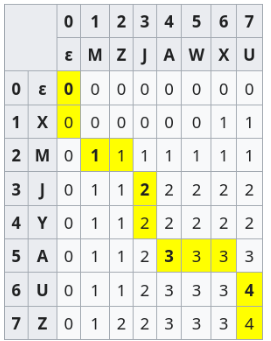)

2. We will use this table to print the LCS length. This is trivial after having constructed the table, since the length will be the number in the last row and column in the table.

3. We will backtrack through the row- and column indices of the table to find matching pairs of letters. This will give us the (reversed) longest common substring. We will use this to return the text of the LCS.

### 2.1 - Create LCS table

Use dynamic programming to create a table and fill it to compute the LCS length.

In [ ]:
def lcs_table(string1, string2):
    m, n = len(string1), len(string2)

    # TODO
    # Create a 2D array with dimensions len(string1) + 1 and len(string2) + 1
    # Each entry in the array should be initialized to 0

    # Fill in the table using dynamic programming to compute LCS length
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                # TODO
                # Base case: The LCS of a string with an empty string is 0
            elif string1[i - 1] == string2[j - 1]:
                # TODO
                # Characters match, extend the LCS
            else:
                # TODO
                # Characters don't match, choose the maximum of the two adjacent cells

    # Return the table
    return table

# Example usage
sequence_A = "XMJYAUZ"
sequence_B = "MZJAWXU"
table = lcs_table(sequence_A, sequence_B)
for row in table:
    print(*row)

Expected output:
```
0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1
0 1 1 1 1 1 1 1
0 1 1 2 2 2 2 2
0 1 1 2 2 2 2 2
0 1 1 2 3 3 3 3
0 1 1 2 3 3 3 4
0 1 2 2 3 3 3 4
```

### 2.2 Return length of LCS

Use table to return the length of the LCS for the two input strings.

In [ ]:
def lcs_length(string1, string2):
    # TODO
    # Get the LCS table
    # Return the length of the LCS

# Example usage
sequence_A = "XMJYAUZ"
sequence_B = "MZJAWXU"
length = lcs_length(sequence_A, sequence_B)
print(f"Length of LCS: {length}")

Expected output:
```
Length of LCS: 4
```

### 2.3 Find the LCS

Create a function that returns the LCS as a string.

In [ ]:
def lcs(string1, string2):
    # TODO
    # Get the LCS table

    # Create an empty array to store the LCS string
    lcs = []

    # Construct the LCS by backtracking
    # i.e. we start at the last indices of the table and look for matches as we move forward towards the first indices
    i, j = len(string1), len(string2)
    while i > 0 and j > 0:
        # TODO
        # If the characters match, move diagonally up and left
        # Otherwise, move in the direction of the larger adjacent cell
    
    # TODO
    # Reverse the LCS string and return it

# Example usage
sequence_A = "XMJYAUZ"
sequence_B = "MZJAWXU"
text = lcs(sequence_A, sequence_B)
print(f"String of LCS: {text}")

Expected output:
```
String of LCS: MJAU
```